# Header 

Linear and Decision Tree Regression Modeling I

Abdulrahman Abed

03/04/2022

# Task I: Set-Up, Data Importation, and Data Exploration

A. Loading packages, setting random_state value, and defining global function.

In [ ]:
# Mathematics and Statistics Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f_oneway
from sklearn.feature_selection import f_regression

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split

# Linear Regression Packages
from sklearn.linear_model import LinearRegression

# Decision Tree Packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Model Evaluation Packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross-Validation Packages
from sklearn.model_selection import cross_validate

In [ ]:
random_state = 0

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

B. Data importation

In [ ]:
%%capture
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/sales.csv', encoding = "ISO-8859-1")

C. Overall structure and summary of the sales data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [ ]:
df.describe(include='all')

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345,6345,6345,6345,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
unique,4088,16,12,5,NaN,NaN,NaN,NaN,NaN
top,Madden NFL 07,PS2,Action,T,NaN,NaN,NaN,NaN,NaN
freq,8,1135,1549,2182,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,69.819385,28.966745,70.765485,152.730969,0.354230
std,NaN,NaN,NaN,NaN,13.945811,19.098594,14.438432,545.962483,0.494404
min,NaN,NaN,NaN,NaN,13.000000,3.000000,5.000000,4.000000,0.010000
25%,NaN,NaN,NaN,NaN,61.000000,14.000000,64.000000,10.000000,0.080000
50%,NaN,NaN,NaN,NaN,72.000000,25.000000,74.000000,24.000000,0.170000
75%,NaN,NaN,NaN,NaN,80.000000,40.000000,81.000000,77.000000,0.410000


In [ ]:
df.head(20)

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27
5,Medal of Honor: Frontline,PS2,Shooter,T,88,29,84,135,2.93
6,Uncharted 3: Drake's Deception,PS3,Action,T,92,97,82,3712,2.77
7,Uncharted 2: Among Thieves,PS3,Action,T,96,105,87,5187,3.27
8,World of Warcraft,PC,Role-Playing,T,93,57,72,2182,0.08
9,Driver,PS,Action,T,87,22,80,78,3.11


D. Dropping a column that should be removed from the dataset

In [ ]:
# Observing variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


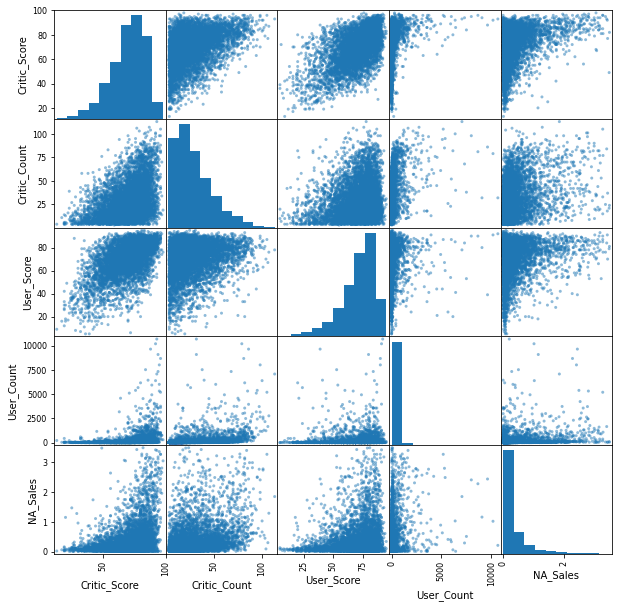

In [ ]:
# Observing coorelation
pd.plotting.scatter_matrix(df, figsize = (10,10))
plt.show()

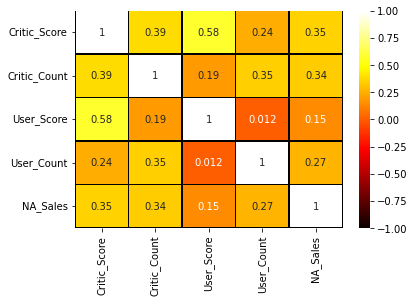

In [ ]:
# Utilizing Seaborn to make a heat map of Variable Correlations
p_cor = df.corr()
ax = sns.heatmap(data = p_cor, annot = True, linewidths = .5, linecolor = 'black', vmin = -1.0, vmax = 1.0, cmap = "hot")
plt.show()


In [ ]:
names = df.Name.value_counts()
print(names)

Madden NFL 07                                  8
Spider-Man 3                                   7
Madden NFL 08                                  7
LEGO Star Wars II: The Original Trilogy        7
LEGO Indiana Jones: The Original Adventures    7
                                              ..
Etrian Odyssey Untold: The Millennium Girl     1
Microsoft Flight Simulator X                   1
Mega Man Battle Network                        1
Colony Wars                                    1
Final Fantasy VII                              1
Name: Name, Length: 4088, dtype: int64


**Explanation of variable to be dropped: **
The variable that should be removed from the dataset is the "names" variable which holds the name of the games in the dataset. This is a categorical variable and each name counts as a unique category. This is essentially the same as having an index column. For machine learning these index columns are not necessary for modeling as there isn't a whole lot of meaning, therefore we will drop "names".

In [ ]:
# Removing "Names"
df1 = df.drop(columns= 'Name')

E. Perform summary statistic on the dependent variable using groupby

In [ ]:
df1.groupby("NA_Sales").describe(include = "object")

Platform                   Genre                           Rating  \
            count unique   top freq count unique           top freq  count   
NA_Sales                                                                     
0.01          209     16    PC   74   209     12        Action   42    209   
0.02          202     16    PC   47   202     12        Action   45    202   
0.03          222     16   PS2   56   222     12        Action   59    222   
0.04          229     16   PS2   52   229     12        Action   61    229   
0.05          231     16   PS2   51   231     12        Action   53    231   
...           ...    ...   ...  ...   ...    ...           ...  ...    ...   
3.40            1      1  X360    1     1      1  Role-Playing    1      1   
3.42            1      1    PS    1     1      1        Sports    1      1   
3.43            1      1    DS    1     1      1        Puzzle    1      1   
3.48            1      1   Wii    1     1      1          Misc    1      1   
3.49            1      1   PS2    1     1      1          Misc    1      1   

                            
         unique   top freq  
NA_Sales                    
0.01          5     T   76  
0.02          4     T   79  
0.03          5     T   88  
0.04          4     T   85  
0.05          5     T   93  
...         ...   ...  ...  
3.40          1     M    1  
3.42          1     T    1  
3.43          1     E    1  
3.48          1  E10+    1  
3.49          1     T    1  

[283 rows x 12 columns]

F. Convert all integer variables to float datatypes. Eliminate outliers

In [ ]:
df1['NA_Sales'] = df1['NA_Sales'] + np.random.random(*df1['NA_Sales'].shape)
df1['User_Count'] = df1['User_Count'] + np.random.random(*df1['User_Count'].shape)
df1['User_Score'] = df1['User_Score'] + np.random.random(*df1['User_Score'].shape)
df1['Critic_Count'] = df1['Critic_Count'] + np.random.random(*df1['Critic_Count'].shape)
df1['Critic_Score'] = df1['Critic_Score'] + np.random.random(*df1['Critic_Score'].shape)
df1.describe()


,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,70.822540,30.476467,72.768198,154.236162,2.851330
std,13.951561,19.100447,14.443046,545.963359,0.821525
min,13.630914,4.209977,7.035074,4.246151,0.470421
25%,62.457834,15.795835,65.541722,11.742269,2.306394
50%,73.010025,26.122112,76.023329,25.861900,2.792558
75%,81.167097,41.279341,83.256628,77.990034,3.309237
max,99.658103,114.632914,97.663371,10666.834169,7.198056


G. Make a normalized histogram of the distribution of the dependent variable

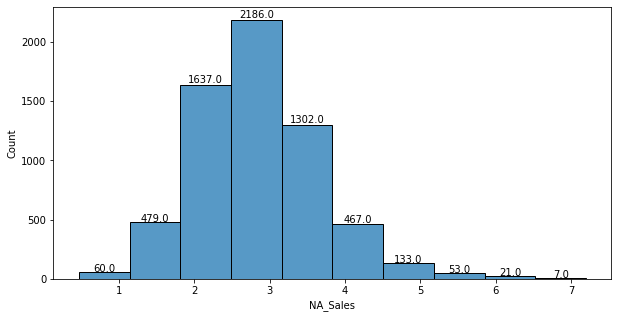

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data = df1['NA_Sales'], bins = 10)
show_values(ax)

# Task II: Pairplots and Coorelations 

A. Create a Seaborn pairplot with different hues for the remaining categorical var

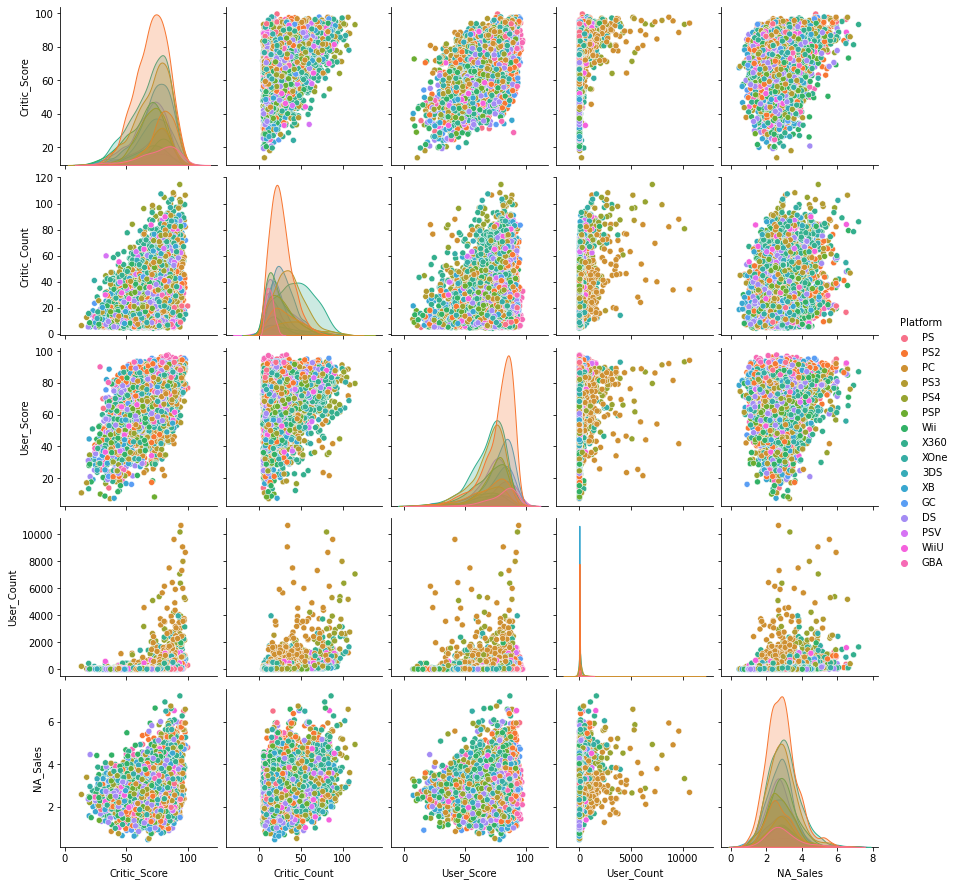

In [ ]:
# Create seaborn pairplot with Platform as the Hue
sns.pairplot(data = df1 ,hue = 'Platform')

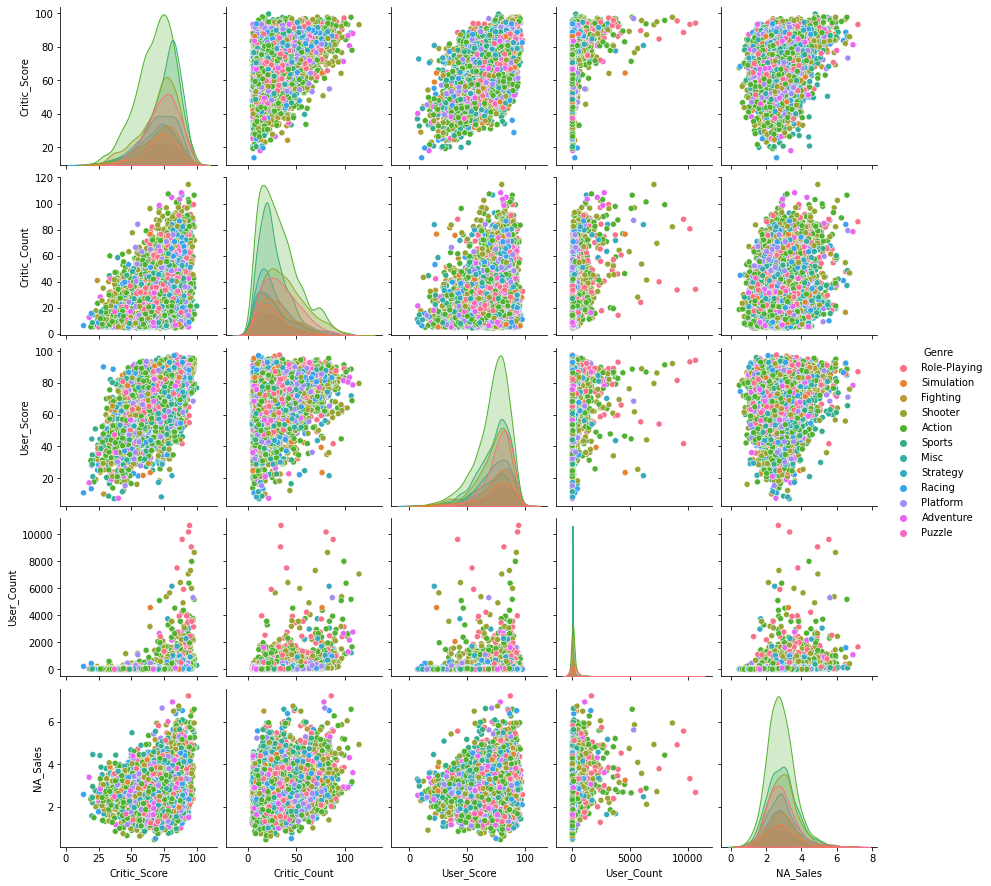

In [ ]:
# Create seaborn pairplot with Genre as the Hue
sns.pairplot(data = df1 ,hue = 'Genre')

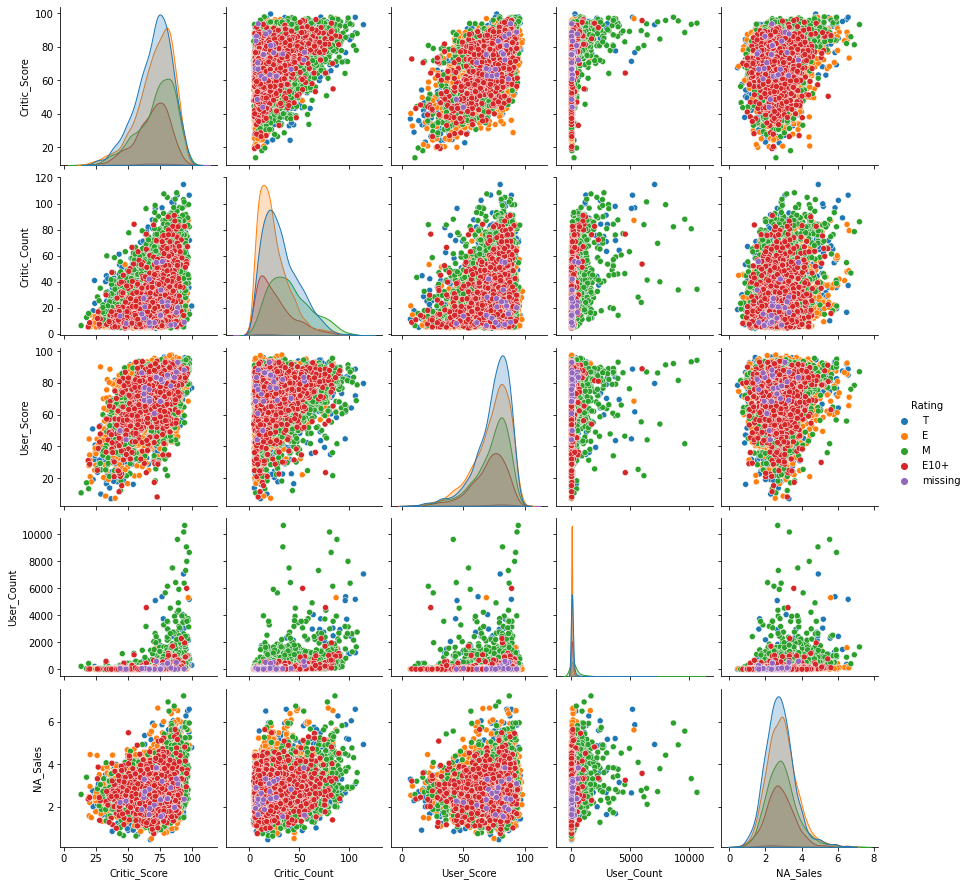

In [ ]:
# Create seaborn pairplot with Rating as the Hue
sns.pairplot(data = df1 ,hue = 'Rating')

B. Create a seaborn pairplot of the data with the dependent var as the hue

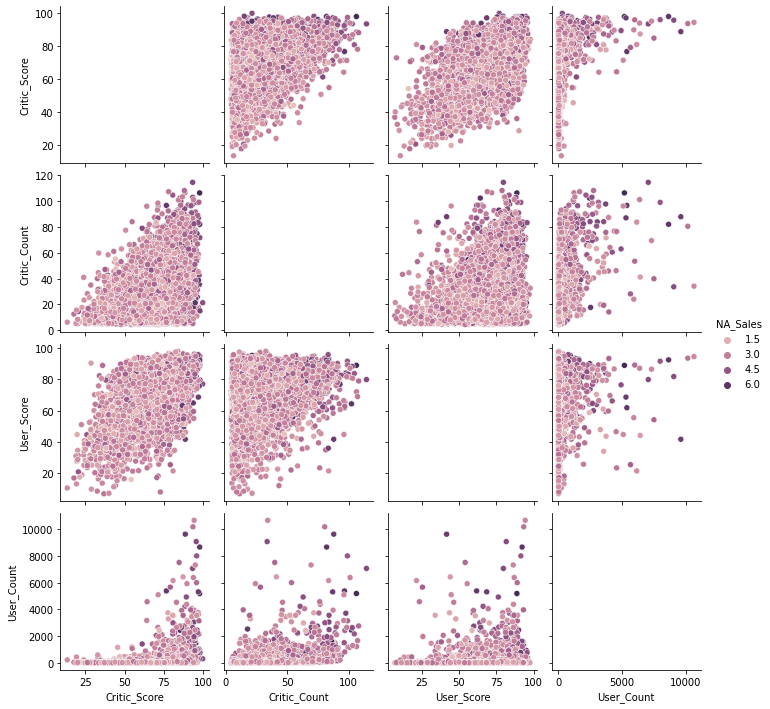

In [ ]:
sns.pairplot(data = df1 ,hue = 'NA_Sales')

C. One-hot encode categorical variables

In [ ]:
# Create lists
object_columns_list = list(df1.select_dtypes(include='object').columns)
integer_columns_list = list(df1.select_dtypes(include='int64').columns)
categorical_columns_list = object_columns_list + integer_columns_list

# One-Hot encode
df1 = pd.get_dummies(df1, columns = categorical_columns_list)
df1.head()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
0,92.827145,21.875237,93.218846,1284.044059,5.822903,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,93.137513,54.491498,88.477947,1057.067809,5.799111,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,86.429934,76.932953,78.025099,887.475026,3.397368,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,91.290212,26.606586,87.122602,645.760321,5.226132,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,96.462797,16.478400,91.902248,369.543035,6.490463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


D. Create and display a dataframe that represents the correlations between all pairs of data variables.



In [ ]:
cor_df = df1.corr()
display(cor_df)

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
Critic_Score,1.000000,0.389221,0.584169,0.243642,0.226873,-0.022212,-0.067551,0.006718,0.020590,0.127810,...,0.067155,0.005238,0.001999,0.125180,0.036726,0.028723,-0.057588,0.053125,-0.031788,0.004608
Critic_Count,0.389221,1.000000,0.191753,0.347976,0.218965,0.024282,-0.081704,-0.134327,-0.094035,0.037880,...,0.075639,0.148800,-0.052775,-0.115492,0.008467,-0.217820,-0.082992,0.271773,0.045717,-0.030835
User_Score,0.584169,0.191753,1.000000,0.011977,0.094126,-0.030605,-0.028352,0.072213,0.070243,-0.042551,...,0.101449,-0.029781,0.013043,-0.007263,0.020724,0.004308,-0.079970,-0.007380,0.058497,0.013238
User_Count,0.243642,0.347976,0.011977,1.000000,0.186417,-0.015873,-0.063422,-0.046964,-0.052806,0.380799,...,0.101911,0.107111,-0.030927,-0.083123,0.025160,-0.126780,-0.054730,0.262832,-0.059513,-0.002167
NA_Sales,0.226873,0.218965,0.094126,0.186417,1.000000,-0.014263,-0.024636,-0.001847,-0.018607,-0.029774,...,0.002340,0.027273,0.001244,0.022783,-0.032446,0.046798,-0.023525,0.029753,-0.050240,-0.027542
Platform_3DS,-0.022212,0.024282,-0.030605,-0.015873,-0.014263,1.000000,-0.042000,-0.029761,-0.036591,-0.033819,...,0.034406,-0.047507,0.013287,-0.049981,-0.008024,0.012174,0.085228,-0.049814,-0.030362,-0.009093
Platform_DS,-0.067551,-0.081704,-0.028352,-0.063422,-0.024636,-0.042000,1.000000,-0.054998,-0.067620,-0.062497,...,0.082193,-0.056030,0.052923,-0.078458,0.050049,0.105769,0.137482,-0.127466,-0.093892,-0.006660
Platform_GBA,0.006718,-0.134327,0.072213,-0.046964,-0.001847,-0.029761,-0.054998,1.000000,-0.047915,-0.044285,...,0.013416,-0.042357,-0.006021,-0.036608,-0.005986,0.174264,-0.038204,-0.087621,-0.066088,-0.011907
Platform_GC,0.020590,-0.094035,0.070243,-0.052806,-0.018607,-0.036591,-0.067620,-0.047915,1.000000,-0.054448,...,-0.029102,-0.009116,-0.013984,0.036620,-0.014964,0.089949,-0.063336,-0.064907,0.015352,-0.014640
Platform_PC,0.127810,0.037880,-0.042551,0.380799,-0.029774,-0.033819,-0.062497,-0.044285,-0.054448,1.000000,...,0.034705,0.081820,0.086974,-0.077775,0.153627,-0.113729,-0.027835,0.144556,0.006923,0.011027


E. Use the correlation dataframe to create a seaborn heatmap of the correlations, including annotations.



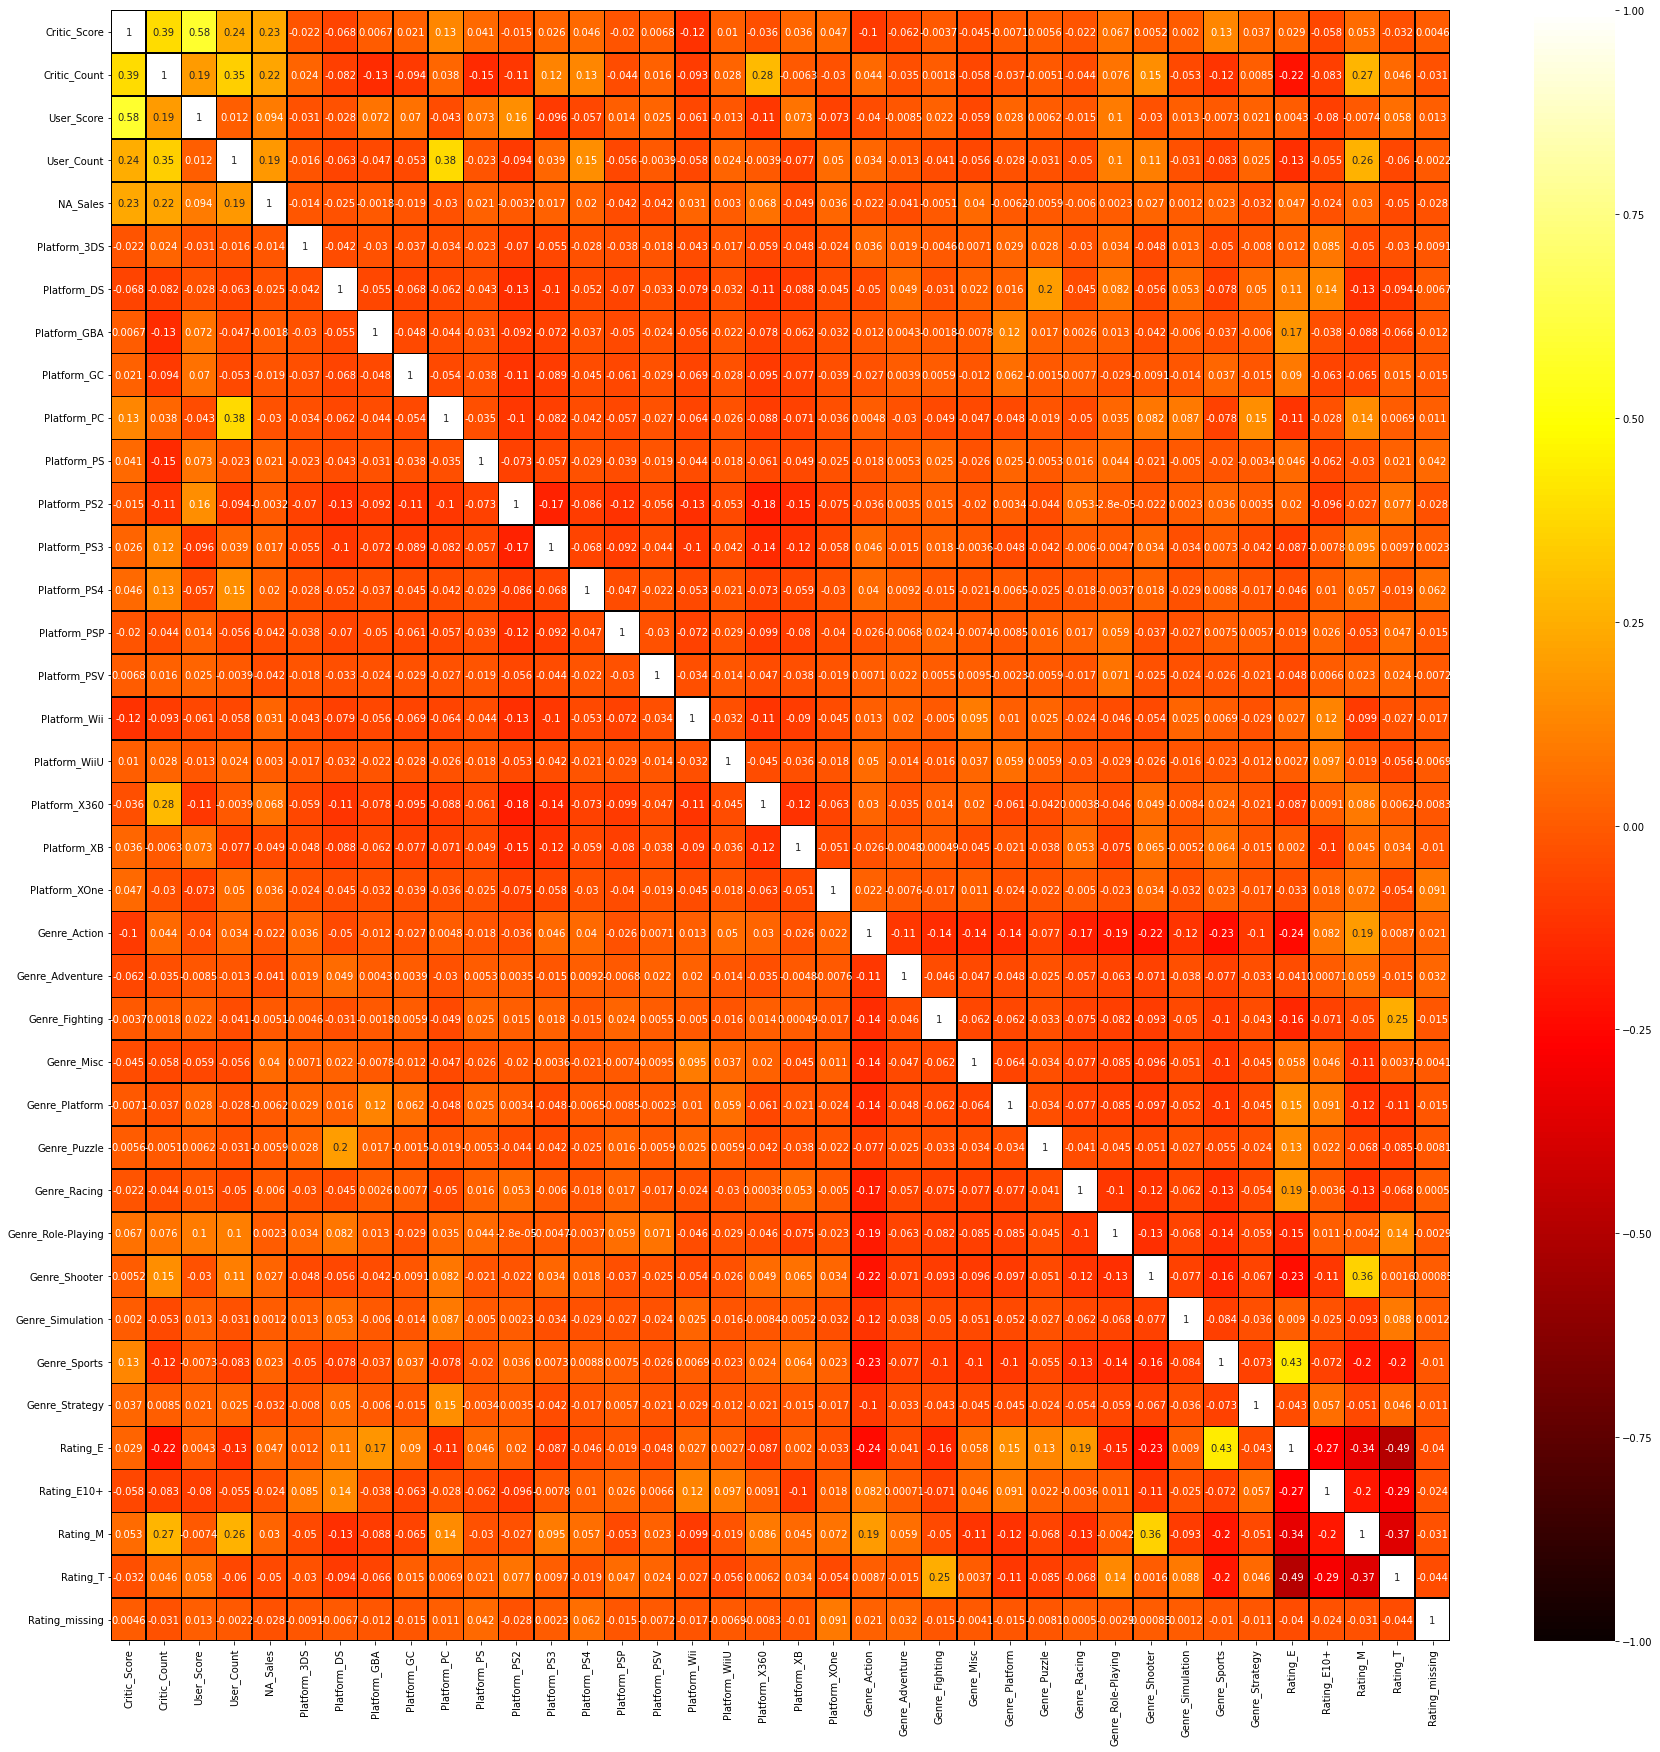

In [ ]:
fig = plt.figure(figsize = (30,30))
ax = sns.heatmap(data = cor_df, annot = True, linewidths = .5, linecolor = 'black', vmin = -1.0, vmax = 1.0, cmap = "hot")
plt.show()

# F. In a text block below the heatmap tell which two columns have the:
* (1) The strongest coorelated variables indicated in this heatmap are User Score and Critic Score
* (2) The strongest negative correlation is between Rating_E and Rating_T. 
* (3) The least correlation variables indicated by this heatmap are User count and User score. These variables are also the closest to zero, which tells us that there is little to no correlation. After fixing my heatmap to include more variables I noticed a lot of the rating variables have very little correlation



# G. Identify an independent variable most likely to affect the results of a regression model and two pairs of variables that are collinear
* (1) The independent variable i think would most likely affect our regression mode is Critic Score
* (2) The two pairs of variables that show multicolinearity are: Critic_Score and Critic_count as well as User_score and Critic_Score.

# Task III: Train/Split and Dependent Variable Analysis

A. Partition the dataset for simple hold-out evaluation (70% for training and the other 30% for testing). Do not stratify by the target

In [ ]:
train_df, test_df = train_test_split(df1, test_size = 0.3, random_state = random_state)

NameError: ignored

B. Show the overall summaries of training and testing sets using info() and describe()

In [ ]:
# training set
train_df.info()

In [ ]:
# training set
train_df.describe(include='all')

In [ ]:
# Testing Set
test_df.info()

In [ ]:
# Testing Set
test_df.describe(include='all')

C. Create normalized histograms of the dependent variable for both the testing dataset and the training dataset.

In [ ]:
# Training Set

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data = train_df['NA_Sales'], bins = 10, stat = 'probability')
show_values(ax)

In [ ]:
# Testing Set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data = test_df['NA_Sales'], bins = 10, stat = 'probability')
show_values(ax)

D. Compare to the normalized histogram of the dependent variable for the entire dataset created in Task I, and comment in a text box below regarding the results..
* The obvious difference between this histogram and the one we created in task 1 is that this histogram expresses probability and the other one expressed count of sales. The other difference is that the previously created histogram skewed slightly more to the right (when we compare it to the training set hist)



# Task IV: Simple and Multivariate Regression

In [ ]:
# Splitting Independent and dependent Data
variable_list = list(set(list(train_df.columns)+list(test_df.columns)))
print("All Variables: "+str(variable_list))

All Variables: ['Platform_PC', 'Platform_PS4', 'Rating_E10+', 'Genre_Simulation', 'Genre_Strategy', 'Platform_X360', 'Platform_GC', 'Critic_Score', 'Genre_Shooter', 'Genre_Racing', 'User_Count', 'Rating_M', 'Platform_PSV', 'Platform_XB', 'Rating_missing', 'Critic_Count', 'Genre_Fighting', 'Rating_T', 'Genre_Adventure', 'Genre_Platform', 'Genre_Role-Playing', 'Platform_PSP', 'Platform_GBA', 'Genre_Puzzle', 'Rating_E', 'Platform_PS3', 'Platform_XOne', 'Platform_DS', 'Platform_Wii', 'NA_Sales', 'Platform_WiiU', 'Platform_PS2', 'Genre_Misc', 'Genre_Sports', 'Platform_3DS', 'Platform_PS', 'User_Score', 'Genre_Action']


In [ ]:
# Separate these into lists of independent variables and dependent variables
Sales_index = variable_list.index('NA_Sales')
dependent_variable_list = [variable_list.pop(Sales_index)]
print("Dependent Variable: "+str(dependent_variable_list))
independent_variable_list = sorted(variable_list)
print("Independent Variables: "+str(independent_variable_list))

Dependent Variable: ['NA_Sales']
Independent Variables: ['Critic_Count', 'Critic_Score', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count', 'User_Score']


In [ ]:
# Perform the independent/dependent data separations
# Perform sanity check of data dimensions with comparisons to training, testing, and original dataframes
X_train = train_df[independent_variable_list].to_numpy()
print("Training Independent Data Shape: "+str(X_train.shape))
y_train_ground_truth = train_df[dependent_variable_list].to_numpy().reshape(-1)
print("Training Dependent Data Shape: "+str(y_train_ground_truth.shape))
print("Training Data Set Shape: "+str(train_df.shape))
print("\n")
X_test = test_df[independent_variable_list].to_numpy()
print("Testing Independent Data Shape: "+str(X_test.shape))
y_test_ground_truth = test_df[dependent_variable_list].to_numpy().reshape(-1)
print("Testing Dependent Data Shape: "+str(y_test_ground_truth.shape))
print("Testing Data Set Shape: "+str(test_df.shape))
print("\n")
X = df1[independent_variable_list].to_numpy()
print("Original Independent Data Shape: "+str(X.shape))
y_ground_truth = df1[dependent_variable_list].to_numpy().reshape(-1)
print("Original Dependent Data Shape: "+str(y_ground_truth.shape))
print("Original Data Set Shape: "+str(df1.shape))

Training Independent Data Shape: (4441, 37)
Training Dependent Data Shape: (4441,)
Training Data Set Shape: (4441, 38)


Testing Independent Data Shape: (1904, 37)
Testing Dependent Data Shape: (1904,)
Testing Data Set Shape: (1904, 38)


Original Independent Data Shape: (6345, 37)
Original Dependent Data Shape: (6345,)
Original Data Set Shape: (6345, 38)


In [ ]:
train_df.head()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
5244,73.374866,34.046060,57.366413,216.740279,1.645962,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4612,90.540019,36.275732,84.216621,367.940445,2.349256,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3007,38.816902,6.039340,64.492645,6.042098,2.940093,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5793,75.671673,27.286999,71.906317,37.745049,2.643835,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2738,59.529476,24.127648,60.366056,8.407628,3.598646,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
print("Order of Independent Variables in NumPy Array: "+str(independent_variable_list))

Order of Independent Variables in NumPy Array: ['Critic_Count', 'Critic_Score', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count', 'User_Score']


**Regression model (1): Critic_Count**

A. Train/fit a Linear Regression Model

In [ ]:
# Critic Count
lr_critic_count = LinearRegression().fit(X_train[:,0].reshape(-1,1),y_train_ground_truth)

B. Make Predictions on the test set

In [ ]:
# Make Predictions on the Testing Set
# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lr_critic_count_pred = lr_critic_count.predict(X_test[:,0].reshape(-1,1))

C. Print

In [ ]:
# Slope Coefficient 
print("Critic Count Slope Coefficient: "+str(lr_critic_count.coef_[0].round(5)))
print("Critic Count Intercept: "+str(lr_critic_count.intercept_.round(5)))
print("Critic Count Training Coefficient of Determination (R-Squared): "+str(lr_critic_count.score(X_train[:,0].reshape(-1,1),y_train_ground_truth).round(5)))
print("Critic Count Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lr_critic_count_pred).round(5)))
print("Critic Count Squared Error: "+str(mean_squared_error(y_test_ground_truth,lr_critic_count_pred).round(5)))
print("Critic Count Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lr_critic_count_pred).round(5)))

Critic Count Slope Coefficient: 0.00969
Critic Count Intercept: 2.55494
Critic Count Training Coefficient of Determination (R-Squared): 0.05084
Critic Count Absolute Error: 0.61875
Critic Count Squared Error: 0.64226
Critic Count Testing Coefficient of Determination (R-Squared): 0.04097


D. Plot the model 

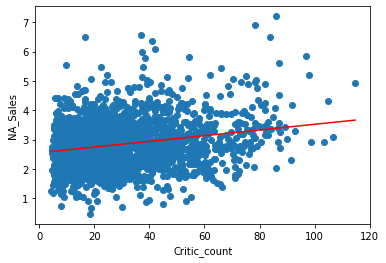

In [ ]:
testing_instances = lr_critic_count_pred.shape[0]
critic_count_data = np.zeros(shape=(testing_instances,2))
critic_count_data[:,0] = X_test[:,0]
critic_count_data[:,1] = y_test_ground_truth
critic_count_xvalues = np.arange(df1['Critic_Count'].min(),df1['Critic_Count'].max(),.001)
critic_count_model_line = lr_critic_count.coef_[0] * critic_count_xvalues + lr_critic_count.intercept_
plt.scatter(critic_count_data[:,0],critic_count_data[:,1])
plt.plot(critic_count_xvalues, critic_count_model_line,c= "red",linestyle='-')
plt.xlabel("Critic_count")
plt.ylabel("NA_Sales")
plt.show()

E. Calculate the p-Value

In [ ]:
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,0])
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

# Calculate the p-Value of the Model with SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,0],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from StatsModels: 2.9259067050817603e-19
p-Value from SciPy: 2.9259067050817507e-19


**Regression model (1): Critic_Score**

A. Train/fit a Linear Regression Model

In [ ]:
# Critic Score
lr_critic_score = LinearRegression().fit(X_train[:,1].reshape(-1,1),y_train_ground_truth)

B. Make Predictions on the test set

In [ ]:
# Make Predictions on the Testing Set
# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lr_critic_score_pred = lr_critic_score.predict(X_test[:,1].reshape(-1,1))

C. Print

In [ ]:
# Slope Coefficient 
print("Critic Score Slope Coefficient: "+str(lr_critic_score.coef_[0].round(5)))
print("Critic Score Intercept: "+str(lr_critic_score.intercept_.round(5)))
print("Critic Score Training Coefficient of Determination (R-Squared): "+str(lr_critic_score.score(X_train[:,1].reshape(-1,1),y_train_ground_truth).round(5)))
print("Critic Score Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lr_critic_score_pred).round(5)))
print("Critic Score Squared Error: "+str(mean_squared_error(y_test_ground_truth,lr_critic_score_pred).round(5)))
print("Critic Score Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lr_critic_score_pred).round(5)))

Critic Score Slope Coefficient: 0.01373
Critic Score Intercept: 1.87654
Critic Score Training Coefficient of Determination (R-Squared): 0.05347
Critic Score Absolute Error: 0.61933
Critic Score Squared Error: 0.63849
Critic Score Testing Coefficient of Determination (R-Squared): 0.04659


D. Plot

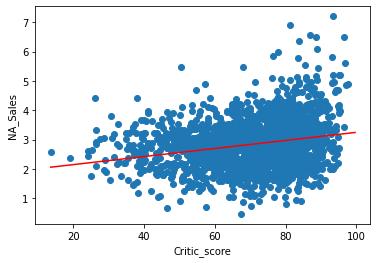

In [ ]:
testing_instances = lr_critic_score_pred.shape[0]
critic_score_data = np.zeros(shape=(testing_instances,2))
critic_score_data[:,0] = X_test[:,1]
critic_score_data[:,1] = y_test_ground_truth
critic_score_xvalues = np.arange(df1['Critic_Score'].min(),df1['Critic_Score'].max(),.001)
critic_score_model_line = lr_critic_score.coef_[0] * critic_score_xvalues + lr_critic_score.intercept_
plt.scatter(critic_score_data[:,0],critic_score_data[:,1])
plt.plot(critic_score_xvalues, critic_score_model_line,c= "red",linestyle='-')
plt.xlabel("Critic_score")
plt.ylabel("NA_Sales")
plt.show()

E. Calculate P-Values

In [ ]:
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,1])
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

# Calculate the p-Value of the Model with SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,1],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from StatsModels: 9.912739687377283e-22
p-Value from SciPy: 9.912739687375168e-22


**Regression model (1): User_Count**

In [ ]:
# A. Fit the model
lr_User_count = LinearRegression().fit(X_train[:,2].reshape(-1,1),y_train_ground_truth)

In [ ]:
# B. Make Predictions on the test set

# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lr_User_count_pred = lr_user_count.predict(X_test[:,2].reshape(-1,1))

In [ ]:
# C. Print

print("User Count Slope Coefficient: "+str(lr_User_count.coef_[0].round(5)))
print("User Count Intercept: "+str(lr_User_count.intercept_.round(5)))
print("User Count Training Coefficient of Determination (R-Squared): "+str(lr_User_count.score(X_train[:,2].reshape(-1,1),y_train_ground_truth).round(5)))
print("User Count Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lr_User_count_pred).round(5)))
print("User Count Squared Error: "+str(mean_squared_error(y_test_ground_truth,lr_User_count_pred).round(5)))
print("User Count Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lr_User_count_pred).round(5)))

User Count Slope Coefficient: -0.0386
User Count Intercept: 2.85947
User Count Training Coefficient of Determination (R-Squared): 0.00041
User Count Absolute Error: 0.62519
User Count Squared Error: 0.66926
User Count Testing Coefficient of Determination (R-Squared): 0.00065


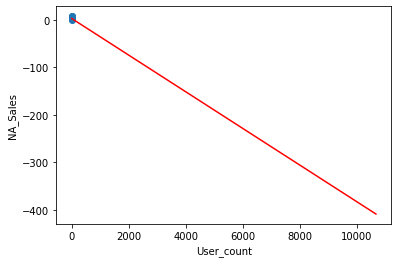

In [ ]:
# D. Plot 
testing_instances = lr_User_count_pred.shape[0]
User_count_data = np.zeros(shape=(testing_instances,2))
User_count_data[:,0] = X_test[:,2]
User_count_data[:,1] = y_test_ground_truth
User_count_xvalues = np.arange(df1['User_Count'].min(),df1['User_Count'].max(),.001)
User_count_model_line = lr_User_count.coef_[0] * User_count_xvalues + lr_User_count.intercept_
plt.scatter(User_count_data[:,0],User_count_data[:,1])
plt.plot(User_count_xvalues, User_count_model_line,c= "red",linestyle='-')
plt.xlabel("User_count")
plt.ylabel("NA_Sales")
plt.show()

In [ ]:
# E. P-Values
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,2])
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

# Calculate the p-Value of the Model with SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,2],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from StatsModels: 0.24068064224009392
p-Value from SciPy: 0.24068064224003186


**Regression model (1): User_Score**

In [ ]:
# A. Fit the model
lr_User_Score = LinearRegression().fit(X_train[:,3].reshape(-1,1),y_train_ground_truth)

In [ ]:
# B. Make Predictions on the test set

# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lr_User_Score_pred = lr_User_Score.predict(X_test[:,3].reshape(-1,1))

In [ ]:
# C. Print

print("User Score Slope Coefficient: "+str(lr_User_Score.coef_[0].round(5)))
print("User Score Intercept: "+str(lr_User_Score.intercept_.round(5)))
print("User Score Training Coefficient of Determination (R-Squared): "+str(lr_User_Score.score(X_train[:,3].reshape(-1,1),y_train_ground_truth).round(5)))
print("User Score Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lr_User_Score_pred).round(5)))
print("User Score Squared Error: "+str(mean_squared_error(y_test_ground_truth,lr_User_Score_pred).round(5)))
print("User Score Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lr_User_Score_pred).round(5)))

User Score Slope Coefficient: -0.2174
User Score Intercept: 2.85709
User Score Training Coefficient of Determination (R-Squared): 0.00222
User Score Absolute Error: 0.62507
User Score Squared Error: 0.66962
User Score Testing Coefficient of Determination (R-Squared): 0.00011


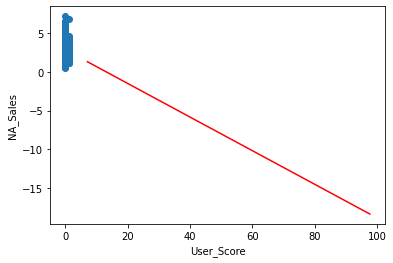

In [ ]:
# D. Plot 
testing_instances = lr_User_Score_pred.shape[0]
User_Score_data = np.zeros(shape=(testing_instances,2))
User_Score_data[:,0] = X_test[:,3]
User_Score_data[:,1] = y_test_ground_truth
User_Score_xvalues = np.arange(df1['User_Score'].min(),df1['User_Score'].max(),.001)
User_Score_model_line = lr_User_Score.coef_[0] * User_Score_xvalues + lr_User_Score.intercept_
plt.scatter(User_Score_data[:,0],User_Score_data[:,1])
plt.plot(User_Score_xvalues, User_Score_model_line,c= "red",linestyle='-')
plt.xlabel("User_Score")
plt.ylabel("NA_Sales")
plt.show()

In [ ]:
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,3])
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

# Calculate the p-Value of the Model with SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,3],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from StatsModels: 0.24976065115089532
p-Value from SciPy: 0.2497606511508169


F. Full Training

In [ ]:
# A. 
#Fit the Linear Regression Model to all independent variables in the training set
lin_reg_full = LinearRegression().fit(X_train,y_train_ground_truth)

In [ ]:
# Extract Model Slope Parameters and their Associated Variables as a Pandas Dataframe
pd.DataFrame({'Feature':independent_variable_list,'Slope Coefficient':lin_reg_full.coef_})

In [ ]:
# B. 
# Predict the fitted Linear Regression Model to the fixed acidity variable in the testing set
# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lin_reg_full_pred = lin_reg_full.predict(X_test)

In [ ]:
# C.
# Evaluate Model Predictions on the testing set with various relevant metrics
print("Full Model Slope Coefficient: "+str(lin_reg_full.coef_[0].round(5)))
print("Intercept: "+str(lin_reg_full.intercept_.round(5)))
print("Training Coefficient of Determination (R-Squared): "+str(lin_reg_full.score(X_train,y_train_ground_truth).round(5)))
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_full_pred).round(5)))
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_full_pred).round(5)))
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_full_pred).round(5)))

Full Model Slope Coefficient: 0.00618
Intercept: 1.93659
Training Coefficient of Determination (R-Squared): 0.12277
Mean Absolute Error: 0.60905
Mean Squared Error: 0.60483
Testing Coefficient of Determination (R-Squared): 0.09685


In [ ]:
# E.
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test)
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

p-Value from StatsModels: 3.3168160960295824e-32


G. Using your heatmap, identify at least one other independent variable that is likely to significantly impact the regression results. Perform steps A-E of this Task for this variable (these variables).

In [ ]:
# Platform 

# A. Fit the model
lr_Platform_PC = LinearRegression().fit(X_train[:,18].reshape(-1,1),y_train_ground_truth)

# B. Make Predictions on the test set
# Reshape the Testing Variable dimension to be (number_of_instances,1) instead of (number_of_instances,)
lr_Platform_PC_pred = lr_Platform_PC.predict(X_test[:,18].reshape(-1,1))

In [ ]:
# C.
# Evaluate Model Predictions on the testing set with various relevant metrics
print("Platform_PC Slope Coefficient: "+str(lr_Platform_PC.coef_[0].round(5)))
print("Intercept: "+str(lr_Platform_PC.intercept_.round(5)))
print("Training Coefficient of Determination (R-Squared): "+str(lr_Platform_PC.score(X_train[:,18].reshape(-1,1),y_train_ground_truth).round(5)))
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lr_Platform_PC_pred).round(5)))
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lr_Platform_PC_pred).round(5)))
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lr_Platform_PC_pred).round(5)))

Platform_PC Slope Coefficient: -0.12986
Intercept: 2.85646
Training Coefficient of Determination (R-Squared): 0.00119
Mean Absolute Error: 0.6248
Mean Squared Error: 0.66963
Testing Coefficient of Determination (R-Squared): 9e-05


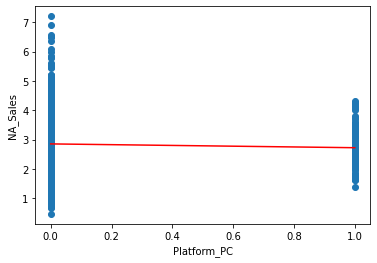

In [ ]:
# D. Plot 
testing_instances = lr_Platform_PC_pred.shape[0]
lr_Platform_PC_data = np.zeros(shape=(testing_instances,2))
lr_Platform_PC_data[:,0] = X_test[:,18]
lr_Platform_PC_data[:,1] = y_test_ground_truth
lr_Platform_PC_xvalues = np.arange(df1['Platform_PC'].min(),df1['Platform_PC'].max(),.001)
lr_Platform_PC_model_line = lr_Platform_PC.coef_[0] * lr_Platform_PC_xvalues + lr_Platform_PC.intercept_
plt.scatter(lr_Platform_PC_data[:,0],lr_Platform_PC_data[:,1])
plt.plot(lr_Platform_PC_xvalues, lr_Platform_PC_model_line,c= "red",linestyle='-')
plt.xlabel("Platform_PC")
plt.ylabel("NA_Sales")
plt.show()

In [ ]:
# E. 
# Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,18])
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

# Calculate the p-Value of the Model with SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,8],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from StatsModels: 0.43802928683524545
p-Value from SciPy: 0.2600232689128539


# Task V: Non Linear Regression

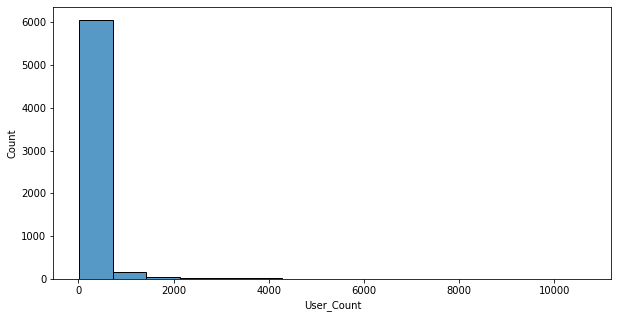

In [ ]:
# A. 
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=df['User_Count'],bins=15)

In [ ]:
# B.
# Transform the variable using a logarithmic function
df['log_User_Count'] = np.log10(df['User_Count'])

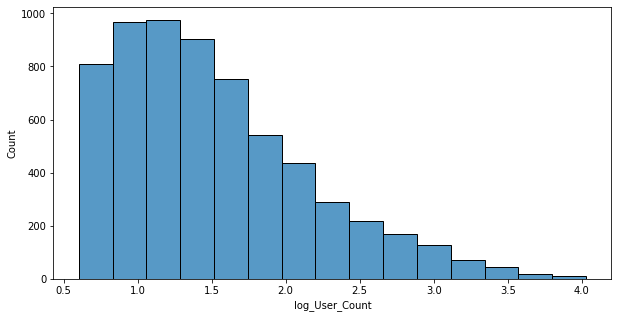

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=df['log_User_Count'],bins=15)

In [ ]:
# C.
df['log_User_Count'].astype('float64')

log_User_Count = df['log_User_Count']

#Add the linearized variable to the original one-hot encoded pandas dataframe
df['uc_log'] = log_User_Count

#re-perform the train/test indpendent/dependent variable splits/separations
df_train, df_test, y_train_ground_truth, y_test_ground_truth = train_test_split(df1.drop('NA_Sales',axis=1),
                                                                                                        df['NA_Sales'],
                                                                                                        train_size=.7,
                                                                                                        random_state=0)

In [ ]:
# D. 
# 1. Fit the Linear Regression Model to all independent variables in the training set
lin_reg_uc2 = LinearRegression().fit(df_train,y_train_ground_truth)

# 2. Predict the fitted Linear Regression Model to the fixed acidity variable in the testing set
lin_reg_uc2_pred = lin_reg_uc2.predict(df_test)

# 3. Evaluate Model Predictions on the testing set with various relevant metrics
print("Slope Coefficient: "+str(lin_reg_uc2.coef_[0].round(5)))
print("Intercept: "+str(lin_reg_uc2.intercept_.round(5)))
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_uc2_pred).round(5)))
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_uc2_pred).round(5)))
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_uc2_pred).round(5)))

# 4. Calculate the p-Value of the Model with StatsModels
X2 = sm.add_constant(X_test[:,5].astype(float))
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

Slope Coefficient: 0.0061
Intercept: -0.73873
Mean Absolute Error: 0.26168
Mean Squared Error: 0.17198
Testing Coefficient of Determination (R-Squared): 0.34046
p-Value from StatsModels: 0.0035734844711844387


In [ ]:
%%shell
 jupyter nbconvert --to html /content/Assignment5_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook /content/Assignment5_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 4226905 bytes to /content/Assignment5_Abed_Abdulrahman.html
